#TFNTF

##TFNTF

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.layers import LSTM, RepeatVector, Dense
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, matthews_corrcoef
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("TFNTF.csv")

# Separate the features (X) and labels (y)
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

# Perform train-test split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling (optional but recommended for deep learning)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

# Reshape the input data for LSTM (assuming a sequence length of 1)
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


X_train_2d = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
X_train_2d = scaler.fit_transform(X_train_2d)
X_train_cnn = X_train_2d.reshape(X_train_scaled.shape)

# Reshape the testing data to 2 dimensions for scaling
X_test_2d = X_test_scaled.reshape(X_test_scaled.shape[0], -1)
X_test_2d = scaler.transform(X_test_2d)
X_test_cnn = X_test_2d.reshape(X_test_scaled.shape)

In [ ]:
# Define the LSTM model architecture with dropout
lstm_model = tf.keras.models.Sequential()
lstm_model.add(tf.keras.layers.LSTM(units=128, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
lstm_model.add(tf.keras.layers.Dropout(0.2))  # Dropout layer
lstm_model.add(tf.keras.layers.Dense(units=64, activation='relu'))
lstm_model.add(tf.keras.layers.Dropout(0.2))  # Dropout layer
lstm_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lstm_history = lstm_model.fit(X_train_reshaped, y_train, batch_size=32, epochs=50, validation_data=(X_test_reshaped, y_test))

In [ ]:
bi_lstm_model = tf.keras.models.Sequential()
bi_lstm_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128, activation='relu'), input_shape=(1, X_train_scaled.shape[1])))
bi_lstm_model.add(tf.keras.layers.Dropout(0.2))
bi_lstm_model.add(tf.keras.layers.Dense(units=64, activation='relu'))
bi_lstm_model.add(tf.keras.layers.Dropout(0.2))
bi_lstm_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

bi_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

bi_lstm_history = bi_lstm_model.fit(X_train_reshaped, y_train, batch_size=32, epochs=50, validation_data=(X_test_reshaped, y_test))


In [ ]:
cnn_model = tf.keras.models.Sequential()
cnn_model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
cnn_model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn_model.add(tf.keras.layers.Dropout(0.2))
cnn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_history = cnn_model.fit(X_train_cnn, y_train, batch_size=32, epochs=50, validation_data=(X_test_cnn, y_test))

In [ ]:
gru_model = tf.keras.models.Sequential()
gru_model.add(tf.keras.layers.GRU(units=128, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
gru_model.add(tf.keras.layers.Dropout(0.2))
gru_model.add(tf.keras.layers.Dense(units=64, activation='relu'))
gru_model.add(tf.keras.layers.Dropout(0.2))
gru_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

gru_history = gru_model.fit(X_train_reshaped, y_train, batch_size=32, epochs=50, validation_data=(X_test_reshaped, y_test))

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Evaluation function
def evaluate_model(model, X_test_reshaped, y_test):
    # Obtain predictions from the model
    y_pred = model.predict(X_test_reshaped)

    # Reshape the predicted values to match the expected shape
    y_pred_binary = np.round(y_pred).flatten()

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_binary)
    print("Accuracy:", accuracy)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred_binary)
    tn, fp, fn, tp = cm.ravel()

    # Calculate sensitivity and specificity
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)

    # Calculate F1 score
    f1_score = 2 * (tp / (2 * tp + fp + fn))
    print("F1 Score:", f1_score)

    # Calculate precision
    precision = precision_score(y_test, y_pred_binary)
    print("Precision:", precision)

    # Calculate Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_test, y_pred_binary)
    print("MCC:", mcc)

    # Calculate ROC and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    print("AUC:", roc_auc)

    # Print classification report
    print(classification_report(y_test, y_pred_binary))

# Evaluate the LSTM model
print("LSTM Model:")
evaluate_model(lstm_model, X_test_reshaped, y_test)

# Evaluate the Bi-LSTM model
print("Bi-LSTM Model:")
evaluate_model(bi_lstm_model, X_test_reshaped, y_test)

# Evaluate the CNN model
print("CNN Model:")
evaluate_model(cnn_model, X_test_cnn, y_test)

# Evaluate the GRU model
print("GRU Model:")
evaluate_model(gru_model, X_test_reshaped, y_test)


LSTM Model:
7/7 [==============================] - 0s 4ms/step
Accuracy: 0.84688995215311
Sensitivity: 0.8818181818181818
Specificity: 0.8080808080808081
F1 Score: 0.8584070796460177
Precision: 0.8362068965517241
MCC: 0.6931527970555388
AUC: 0.8932966023875115
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        99
           1       0.84      0.88      0.86       110

    accuracy                           0.85       209
   macro avg       0.85      0.84      0.85       209
weighted avg       0.85      0.85      0.85       209

Bi-LSTM Model:
7/7 [==============================] - 0s 4ms/step
Accuracy: 0.8325358851674641
Sensitivity: 0.8727272727272727
Specificity: 0.7878787878787878
F1 Score: 0.8458149779735683
Precision: 0.8205128205128205
MCC: 0.664461234996505
AUC: 0.8947658402203856
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        99
           1       0.82      0.87     

##TFNTF Visualization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import make_moons, make_circles
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import load_model
import seaborn as sns
import time

# Load your dataset
df = pd.read_csv("TFNTF.csv")

# Separate the features (X) and labels (y)
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

# Perform train-test split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling (optional but recommended for deep learning)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

# Reshape the input data for LSTM (assuming a sequence length of 1)
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Reshape for CNN model (2D)
X_train_2d = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
X_train_2d = scaler.fit_transform(X_train_2d)
X_train_cnn = X_train_2d.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)

X_test_2d = X_test_scaled.reshape(X_test_scaled.shape[0], -1)
X_test_2d = scaler.transform(X_test_2d)
X_test_cnn = X_test_2d.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

In [ ]:
# Dimensionality Reduction with PCA
pca = PCA(n_components=50)
pca_result = pca.fit_transform(X_train_scaled)

# t-SNE for further dimensionality reduction
time_start = time.time()
tsne = TSNE(n_components=2, perplexity=50, n_iter=300, random_state=42)
tsne_pca_results = tsne.fit_transform(pca_result)
print(f't-SNE done! Time elapsed: {time.time()-time_start} seconds')

# Load pretrained models
lstm_model = load_model("lstm_model.h5")
bi_lstm_model = load_model("bi_lstm_model.h5")
cnn_model = load_model("cnn_model.h5")
gru_model = load_model("gru_model.h5")

t-SNE done! Time elapsed: 2.692864179611206 seconds


Dataset 0: X.shape = (100, 2), y.shape = (100,)
[LightGBM] [Info] Number of positive: 35, number of negative: 35
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50
[LightGBM] [Info] Number of data points in the train set: 70, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


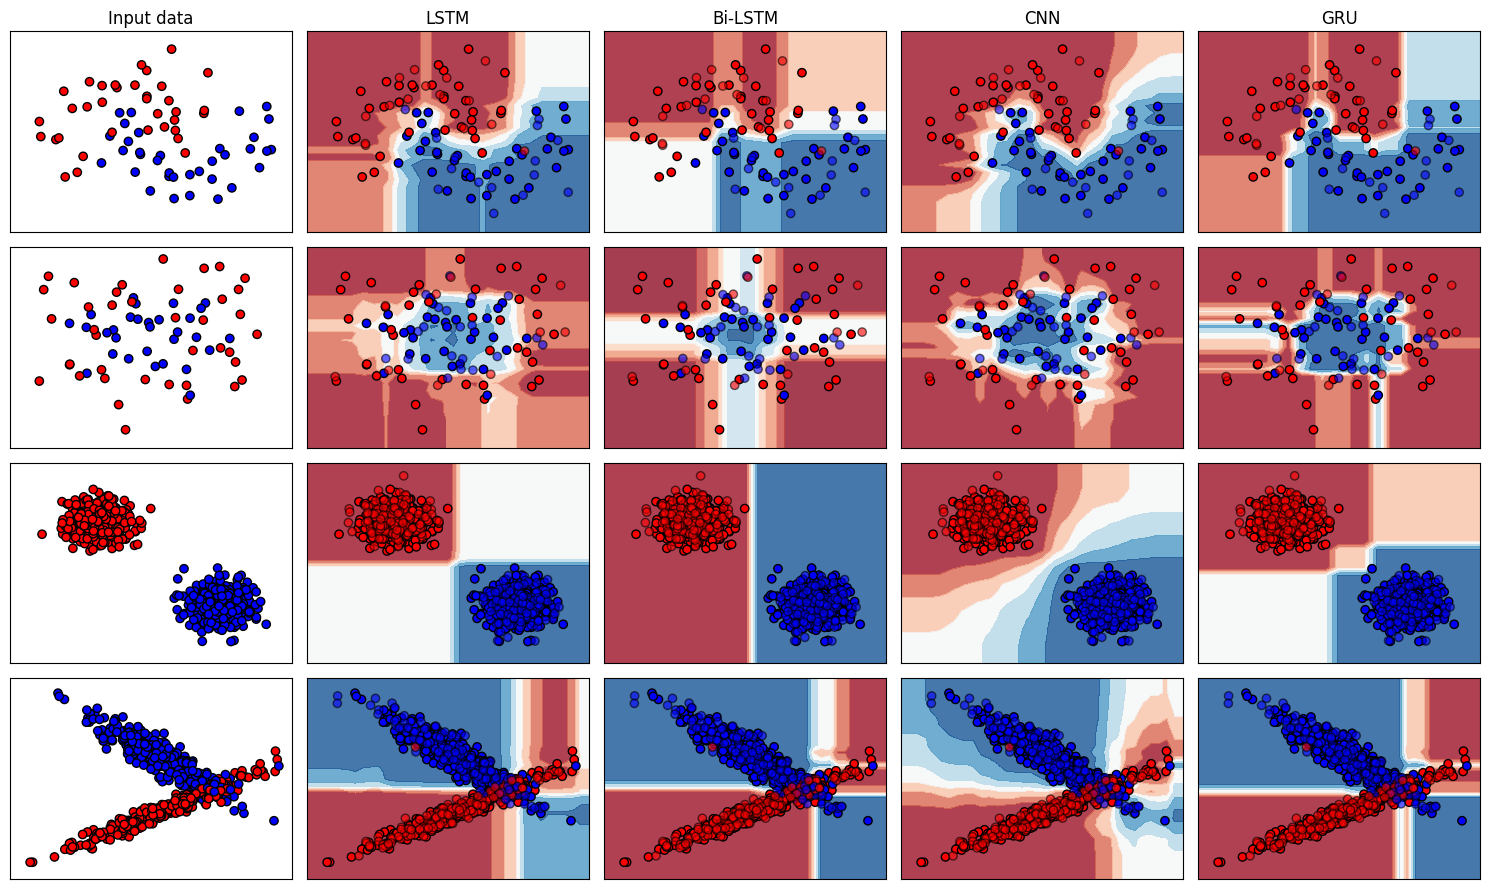

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_checkerboard



# Define parameters and classifiers
h = 0.2
names = ["LSTM", "Bi-LSTM", "CNN", "GRU"]
classifiers = [
    RandomForestClassifier(max_depth=5, n_estimators=100),
    LGBMClassifier(),
    ExtraTreesClassifier(),
    XGBClassifier()
]

# Dummy example data for tsne_pca_results and y
# Replace these with your actual data
tsne_pca_results = np.random.rand(1000, 2)  # Example data, replace with actual
y = np.random.randint(0, 2, 1000)  # Example labels, replace with actual

X, y = tsne_pca_results, y
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.3, factor=0.5, random_state=1),
    make_blobs(n_samples=1000, centers=2, random_state=42),

    make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)


]

figure = plt.figure(figsize=(15, 9))
i = 1

# Iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # Preprocess dataset, split into training and test part
    X, y = ds

    # Check and print shapes of X and y
    print(f"Dataset {ds_cnt}: X.shape = {X.shape}, y.shape = {y.shape}")

    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # Iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )

        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.savefig("classifier_comparison.png", dpi=600)
plt.show()


[LightGBM] [Info] Number of positive: 403, number of negative: 397
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503750 -> initscore=0.015000
[LightGBM] [Info] Start training from score 0.015000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

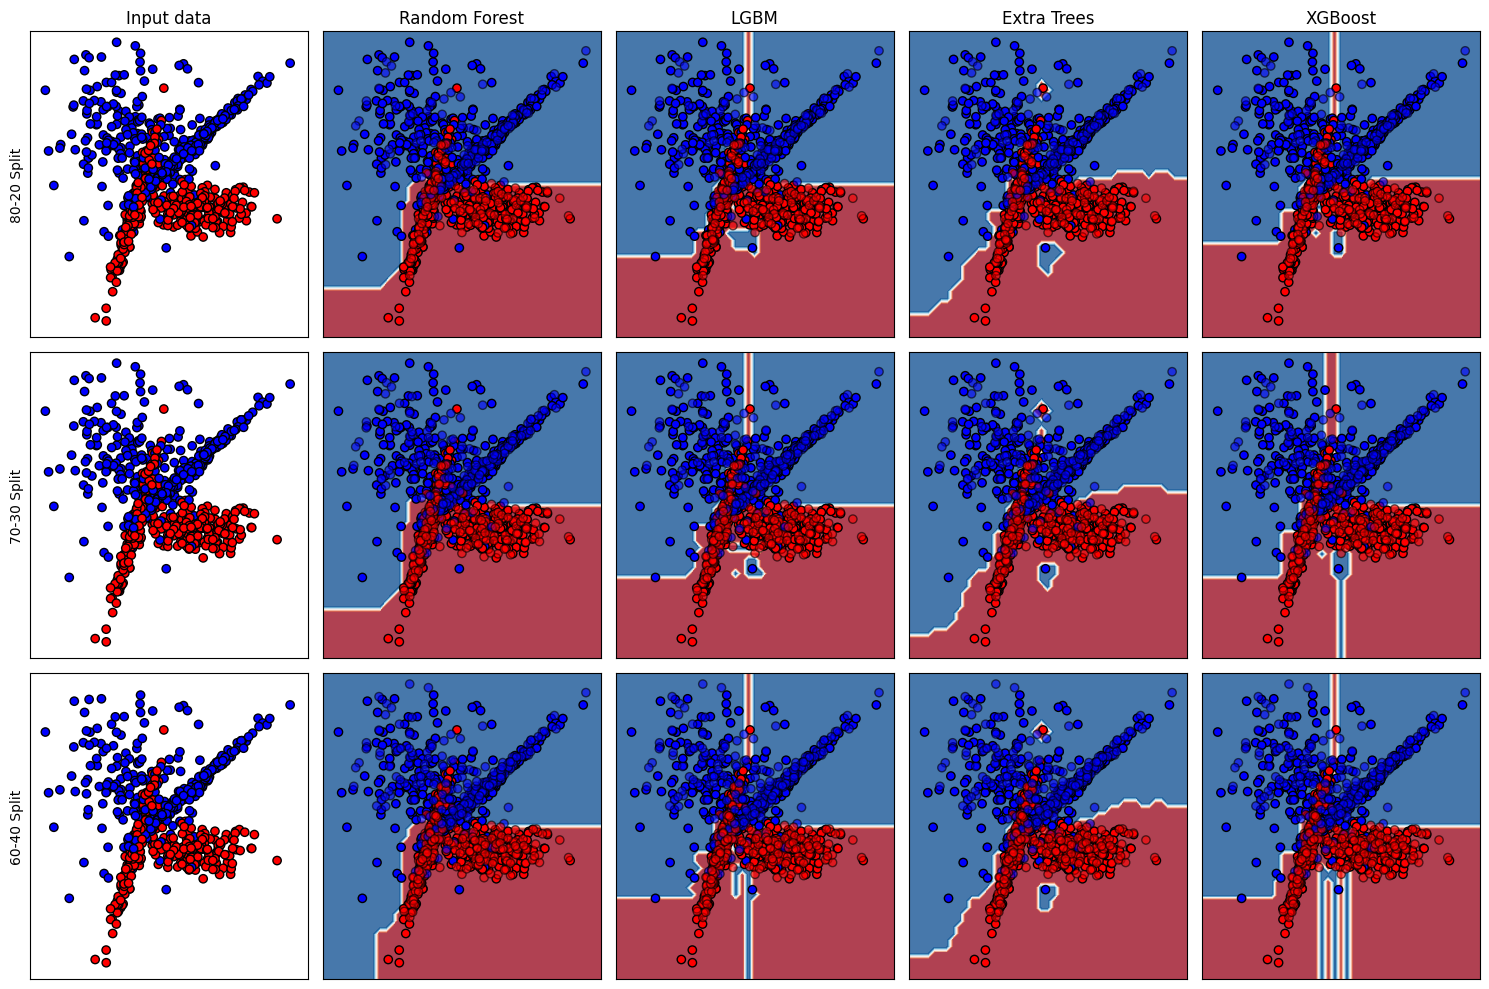

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define parameters and classifiers
h = 0.2
name = ["LSTM", "Bi LSTM", "CNN", "GRU"]
classifiers = [
    RandomForestClassifier(max_depth=5, n_estimators=100),
    LGBMClassifier(),
    ExtraTreesClassifier(),
    XGBClassifier()
]

# Create a multi-class dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, random_state=42)

# Dataset splits
dataset_splits = [
    ("80-20 Split", 0.2),
    ("70-30 Split", 0.3),
    ("60-40 Split", 0.4)
]

figure = plt.figure(figsize=(15, 10))
i = 1

# Iterate over dataset splits
for split_name, test_size in dataset_splits:
    # Preprocess dataset, split into training and test parts
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(dataset_splits), len(classifiers) + 1, i)
    if i == 1:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_ylabel(split_name)
    i += 1

    # Iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(dataset_splits), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.argmax(axis=1)

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )

        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if split_name == "80-20 Split":
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.savefig("classifier_comparison.png", dpi=600)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier

# Define parameters and classifiers
h = 0.2
names = ["Random Forest", "LGBM", "ET", "XGB"]
classifiers = [
    RandomForestClassifier(max_depth=5, n_estimators=100),
    LGBMClassifier(),
    ExtraTreesClassifier(),
    XGBClassifier()
]

# Create a multi-class dataset with 9 classes and 2 informative features
n_samples = 1000
n_features = 2
n_informative = 2
n_classes = 9

# Adjust n_clusters_per_class to be compatible with n_classes and n_informative
n_clusters_per_class = 1  # Set to 1 to avoid exceeding 2**n_informative

# Prepare 9 binary datasets where each class is considered as positive in turn
dataset_splits = [(f"Class {i} as positive", i) for i in range(n_classes)]

figure = plt.figure(figsize=(20, 15))
i = 1

# Iterate over dataset splits
for split_name, positive_class in dataset_splits:
    # Create a multi-class dataset with adjusted parameters
    X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=n_informative,
                               n_redundant=0, n_classes=n_classes, n_clusters_per_class=n_clusters_per_class,
                               random_state=42)

    # Convert to binary labels where positive class is 1 and all others are 0
    binary_y = np.where(y == positive_class, 1, 0)

    # Preprocess dataset, split into training and test parts
    X_train, X_test, y_train, y_test = train_test_split(
        X, binary_y, test_size=0.3, random_state=42, stratify=binary_y
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(n_classes, len(classifiers) + 1, i)
    if i == 1:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_ylabel(split_name)
    i += 1

    # Iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(n_classes, len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            proba = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
            if proba.shape[1] > 1:
                Z = proba[:, 1]
            else:
                Z = proba[:, 0]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )

        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if split_name == f"Class {positive_class} as positive":
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.savefig("classifier_comparison.png", dpi=600)
plt.show()


ValueError: n_classes(9) * n_clusters_per_class(1) must be smaller or equal 2**n_informative(2)=4

<Figure size 2000x1500 with 0 Axes>

30/30 [==============================] - 0s 3ms/step


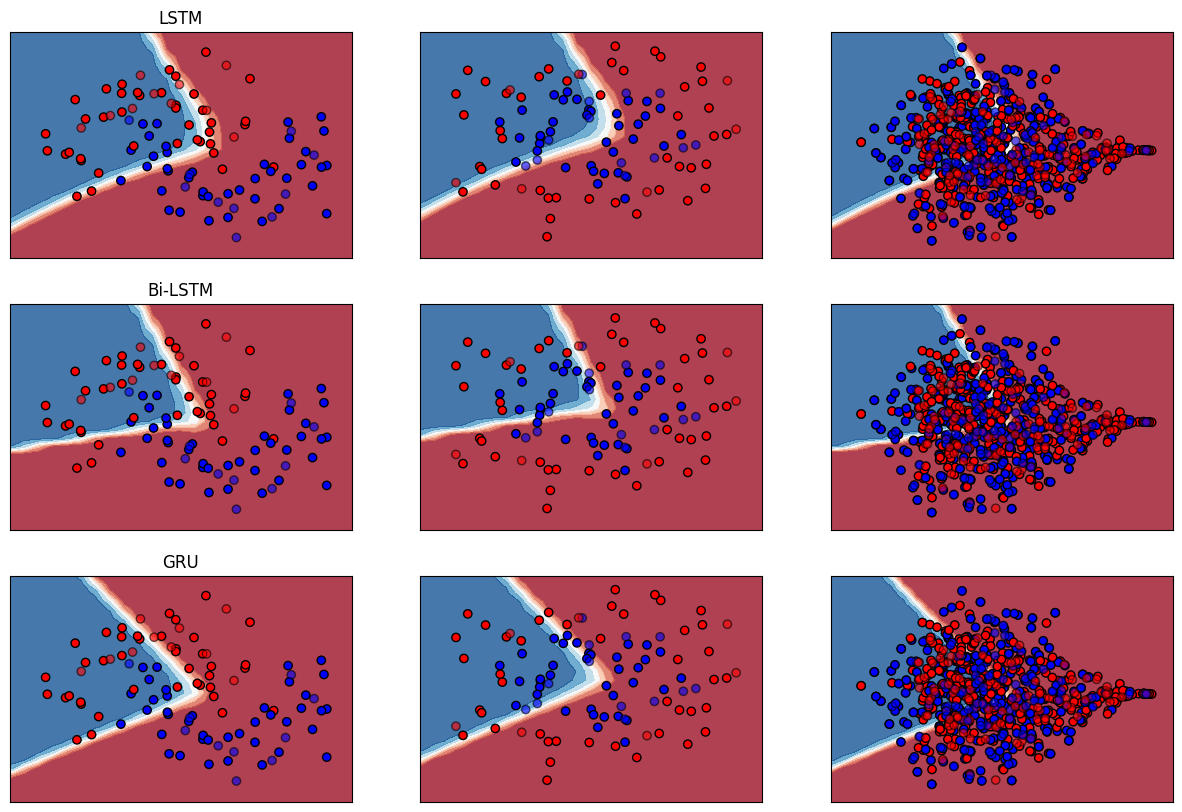

In [ ]:
i = 1
figure = plt.figure(figsize=(15, 10))

# Iterate over classifiers
for name, clf in zip(names, classifiers):
    for ds_cnt, ds in enumerate(datasets):
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        cm = plt.cm.RdBu
        cm_bright = ListedColormap(["#FF0000", "#0000FF"])

        # Ensure i does not exceed the maximum number of subplots
        if i <= len(datasets) * len(classifiers):
            ax = plt.gcf().add_subplot(len(datasets), len(classifiers), i)

            # Classifier-specific plotting code (unchanged from the second code snippet)
            if name in ["LSTM", "Bi-LSTM", "GRU"]:
                Z_input = np.c_[xx.ravel(), yy.ravel()].reshape(-1, 1, 2)
                Z_input = np.tile(Z_input, (1, 1, 76))
                Z = clf.predict(Z_input)
            elif name == "CNN":
                Z_input = np.c_[xx.ravel(), yy.ravel()].reshape(-1, xx.shape[1])
                Z_input = Z_input.reshape(-1, xx.shape[1], 1)
                Z = clf.predict(Z_input)
            else:
                Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors="k", alpha=0.6)
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())

            if ds_cnt == 0:
                ax.set_title(name)

            i += 1

# Second code snippet
import seaborn as sns

# Data setup for sns.scatterplot (you may need to adjust `tsne_pca_results` and `y` accordingly)
tsne_pca_results = np.random.randn(100, 2)  # Example data, replace with your actual data
y = np.random.randint(0, 2, 100)  # Example labels, replace with your actual labels

plt.figure(figsize=(20, 20), dpi=600)
sns.scatterplot(
    x=tsne_pca_results[:, 0], y=tsne_pca_results[:, 1],
    hue=y,
    legend="full",
    alpha=0.3
).set(title="Feature Space Visualization of Raw Data")

plt.tight_layout()
plt.show()

In [ ]:
# Define the global step size for meshgrid
h = 0.2

# Define the names and classifiers to iterate over
names = [
    "LSTM",
    "Bi LSTM",
    "GRU"
]

classifiers = [
    lstm_model,
    bi_lstm_model,
    gru_model
]

# Create synthetic datasets
linearly_separable = (make_moons(noise=0.3, random_state=0), "Moons Dataset")
datasets = [
    (make_moons(noise=0.3, random_state=0), "Moons Dataset"),
    (make_circles(noise=0.2, factor=0.5, random_state=1), "Circles Dataset"),
    (linearly_separable, "Linearly Separable Dataset")
]

# Create a figure with specified size
figure = plt.figure(figsize=(27, 9))

<Figure size 2700x900 with 0 Axes>

ValueError: Data cardinality is ambiguous:
  x sizes: 835
  y sizes: 60
Make sure all arrays contain the same number of samples.

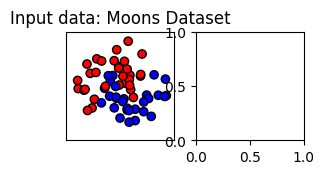

In [ ]:
# Initialize subplot index
i = 1

# Iterate over each dataset
for ds_cnt, (ds, ds_name) in enumerate(datasets):
    # Preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    # Define the range for meshgrid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # Create meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Define colormaps
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])

    # Plot the dataset
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data: " + ds_name)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # Iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train_reshaped, y_train)
        score = clf.score(X_test, y_test)

        # Plot decision boundary or probability contour
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot training and testing points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors="k", alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())

        # Set title for the subplot (only for the first dataset)
        if ds_cnt == 0:
            ax.set_title(name)

        # Display score on the plot
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )

        i += 1

# Adjust layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()


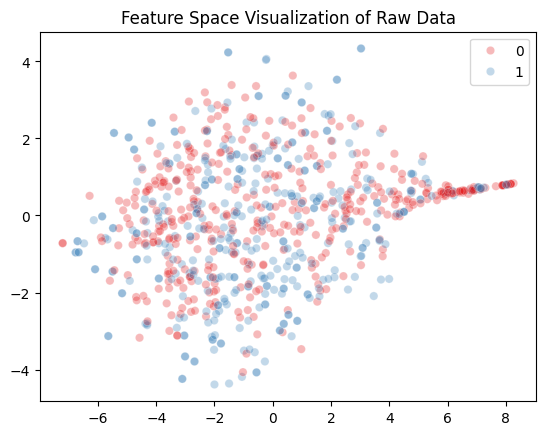

In [ ]:
# Visualize the feature space with t-SNE and PCA results
sns.scatterplot(
    x=tsne_pca_results[:, 0], y=tsne_pca_results[:, 1],
    hue=y_vis,
    palette="Set1",
    alpha=0.3
).set(title="Feature Space Visualization of Raw Data")

plt.show()

In [ ]:
import tensorflow as tf

##TFFamily

In [ ]:
# Load the dataset
df = pd.read_csv("TFFamily.csv")

# Separate the features (X) and labels (y)
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

# Perform train-test split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling (optional but recommended for deep learning)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

# Reshape the input data for LSTM (assuming a sequence length of 1)
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [ ]:
# Define the LSTM model architecture with dropout
lstm_model = tf.keras.models.Sequential()
lstm_model.add(tf.keras.layers.LSTM(units=128, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
lstm_model.add(tf.keras.layers.Dropout(0.2))  # Dropout layer
lstm_model.add(tf.keras.layers.Dense(units=64, activation='relu'))
lstm_model.add(tf.keras.layers.Dropout(0.2))  # Dropout layer
lstm_model.add(tf.keras.layers.Dense(units=9, activation='softmax'))  # Change to softmax for multi-class classification

# Compile the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
lstm_history = lstm_model.fit(X_train_reshaped, y_train, batch_size=32, epochs=50, validation_data=(X_test_reshaped, y_test))

Epoch 1/50
203/203 [==============================] - 4s 8ms/step - loss: 1.3006 - accuracy: 0.5995 - val_loss: 0.5676 - val_accuracy: 0.8426
Epoch 2/50
203/203 [==============================] - 1s 6ms/step - loss: 0.4401 - accuracy: 0.8688 - val_loss: 0.2642 - val_accuracy: 0.9173
Epoch 3/50
203/203 [==============================] - 1s 6ms/step - loss: 0.2417 - accuracy: 0.9295 - val_loss: 0.1430 - val_accuracy: 0.9623
Epoch 4/50
203/203 [==============================] - 1s 6ms/step - loss: 0.1463 - accuracy: 0.9576 - val_loss: 0.1041 - val_accuracy: 0.9704
Epoch 5/50
203/203 [==============================] - 1s 6ms/step - loss: 0.1019 - accuracy: 0.9698 - val_loss: 0.0765 - val_accuracy: 0.9784
Epoch 6/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0777 - accuracy: 0.9781 - val_loss: 0.0703 - val_accuracy: 0.9784
Epoch 7/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0531 - accuracy: 0.9853 - val_loss: 0.0622 - val_accuracy: 0.9858
Epoch 

In [ ]:
# Define the Bi-LSTM model architecture with dropout
bi_lstm_model = tf.keras.models.Sequential()
bi_lstm_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128, activation='relu'), input_shape=(1, X_train_scaled.shape[1])))
bi_lstm_model.add(tf.keras.layers.Dropout(0.2))
bi_lstm_model.add(tf.keras.layers.Dense(units=64, activation='relu'))
bi_lstm_model.add(tf.keras.layers.Dropout(0.2))
bi_lstm_model.add(tf.keras.layers.Dense(units=9, activation='softmax'))  # Change to softmax for multi-class classification

# Compile the model
bi_lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
bi_lstm_history = bi_lstm_model.fit(X_train_reshaped, y_train, batch_size=32, epochs=50, validation_data=(X_test_reshaped, y_test))


Epoch 1/50
203/203 [==============================] - 6s 11ms/step - loss: 1.0760 - accuracy: 0.6718 - val_loss: 0.4125 - val_accuracy: 0.8790
Epoch 2/50
203/203 [==============================] - 2s 9ms/step - loss: 0.3160 - accuracy: 0.9097 - val_loss: 0.1627 - val_accuracy: 0.9549
Epoch 3/50
203/203 [==============================] - 2s 9ms/step - loss: 0.1500 - accuracy: 0.9606 - val_loss: 0.0946 - val_accuracy: 0.9735
Epoch 4/50
203/203 [==============================] - 2s 9ms/step - loss: 0.0822 - accuracy: 0.9787 - val_loss: 0.0729 - val_accuracy: 0.9790
Epoch 5/50
203/203 [==============================] - 3s 15ms/step - loss: 0.0491 - accuracy: 0.9884 - val_loss: 0.0619 - val_accuracy: 0.9809
Epoch 6/50
203/203 [==============================] - 2s 10ms/step - loss: 0.0350 - accuracy: 0.9917 - val_loss: 0.0498 - val_accuracy: 0.9877
Epoch 7/50
203/203 [==============================] - 2s 9ms/step - loss: 0.0270 - accuracy: 0.9931 - val_loss: 0.0484 - val_accuracy: 0.9852
Epo

In [ ]:
# Define the CNN model architecture
cnn_model = tf.keras.models.Sequential()
cnn_model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
cnn_model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn_model.add(tf.keras.layers.Dropout(0.2))
cnn_model.add(tf.keras.layers.Dense(units=9, activation='softmax'))  # Change to softmax for multi-class classification

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(X_train_cnn, y_train, batch_size=32, epochs=50, validation_data=(X_test_cnn, y_test))


Epoch 1/50
203/203 [==============================] - 6s 19ms/step - loss: 1.0185 - accuracy: 0.6765 - val_loss: 0.4521 - val_accuracy: 0.8691
Epoch 2/50
203/203 [==============================] - 2s 11ms/step - loss: 0.4062 - accuracy: 0.8736 - val_loss: 0.2627 - val_accuracy: 0.9167
Epoch 3/50
203/203 [==============================] - 2s 10ms/step - loss: 0.2629 - accuracy: 0.9215 - val_loss: 0.1749 - val_accuracy: 0.9488
Epoch 4/50
203/203 [==============================] - 2s 11ms/step - loss: 0.1837 - accuracy: 0.9443 - val_loss: 0.1390 - val_accuracy: 0.9667
Epoch 5/50
203/203 [==============================] - 2s 11ms/step - loss: 0.1557 - accuracy: 0.9554 - val_loss: 0.1386 - val_accuracy: 0.9623
Epoch 6/50
203/203 [==============================] - 3s 15ms/step - loss: 0.1164 - accuracy: 0.9619 - val_loss: 0.1148 - val_accuracy: 0.9648
Epoch 7/50
203/203 [==============================] - 3s 13ms/step - loss: 0.0940 - accuracy: 0.9698 - val_loss: 0.0971 - val_accuracy: 0.9667

In [ ]:
# Define the GRU model architecture
gru_model = tf.keras.models.Sequential()
gru_model.add(tf.keras.layers.GRU(units=128, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
gru_model.add(tf.keras.layers.Dropout(0.2))
gru_model.add(tf.keras.layers.Dense(units=64, activation='relu'))
gru_model.add(tf.keras.layers.Dropout(0.2))
gru_model.add(tf.keras.layers.Dense(units=9, activation='softmax'))  # Change to softmax for multi-class classification

# Compile the model
gru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
gru_history = gru_model.fit(X_train_reshaped, y_train, batch_size=32, epochs=50, validation_data=(X_test_reshaped, y_test))


Epoch 1/50
203/203 [==============================] - 5s 6ms/step - loss: 1.2658 - accuracy: 0.5966 - val_loss: 0.5726 - val_accuracy: 0.8395
Epoch 2/50
203/203 [==============================] - 1s 5ms/step - loss: 0.4812 - accuracy: 0.8515 - val_loss: 0.2621 - val_accuracy: 0.9173
Epoch 3/50
203/203 [==============================] - 1s 5ms/step - loss: 0.2716 - accuracy: 0.9190 - val_loss: 0.1606 - val_accuracy: 0.9494
Epoch 4/50
203/203 [==============================] - 1s 5ms/step - loss: 0.1752 - accuracy: 0.9483 - val_loss: 0.1090 - val_accuracy: 0.9710
Epoch 5/50
203/203 [==============================] - 1s 5ms/step - loss: 0.1241 - accuracy: 0.9620 - val_loss: 0.0847 - val_accuracy: 0.9772
Epoch 6/50
203/203 [==============================] - 2s 8ms/step - loss: 0.0893 - accuracy: 0.9744 - val_loss: 0.0684 - val_accuracy: 0.9815
Epoch 7/50
203/203 [==============================] - 2s 8ms/step - loss: 0.0714 - accuracy: 0.9799 - val_loss: 0.0650 - val_accuracy: 0.9809
Epoch 

In [ ]:
# Save the entire model to a HDF5 file
gru_model.save('gru_modeltffam.h5')
lstm_model.save('lstm_modeltffam.h5')
bi_lstm_model.save('bi_lstm_modeltffam.h5')
cnn_model.save('cnn_modeltffam.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, matthews_corrcoef
import numpy as np

# Evaluation function for multi-class classification
def evaluate_model(model, X_test_reshaped, y_test):
    # Obtain predictions from the model
    y_pred_prob = model.predict(X_test_reshaped)

    # Convert probabilities to class predictions
    y_pred = np.argmax(y_pred_prob, axis=1)

    # If y_test is one-hot encoded, convert it to class labels
    if len(y_test.shape) > 1 and y_test.shape[1] > 1:
        y_test_classes = np.argmax(y_test, axis=1)
    else:
        y_test_classes = y_test

    # Calculate accuracy
    accuracy = accuracy_score(y_test_classes, y_pred)
    print("Accuracy:", accuracy)

    # Calculate precision
    precision = precision_score(y_test_classes, y_pred, average='weighted')
    print("Precision (weighted):", precision)

    # Calculate recall
    recall = recall_score(y_test_classes, y_pred, average='weighted')
    print("Recall (weighted):", recall)

    # Calculate F1 score
    f1 = f1_score(y_test_classes, y_pred, average='weighted')
    print("F1 Score (weighted):", f1)

    # Calculate Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_test_classes, y_pred)
    print("MCC:", mcc)

# Evaluate the models
print("LSTM Model:")
evaluate_model(lstm_model, X_test_reshaped, y_test)

print("Bi-LSTM Model:")
evaluate_model(bi_lstm_model, X_test_reshaped, y_test)

print("CNN Model:")
evaluate_model(cnn_model, X_test_cnn, y_test)

print("GRU Model:")
evaluate_model(gru_model, X_test_reshaped, y_test)


LSTM Model:
51/51 [==============================] - 1s 5ms/step
Accuracy: 0.9895061728395061
Precision (weighted): 0.9896002490323723
Recall (weighted): 0.9895061728395061
F1 Score (weighted): 0.9894394290519727
MCC: 0.9882169611201996
Bi-LSTM Model:
51/51 [==============================] - 1s 7ms/step
Accuracy: 0.9864197530864197
Precision (weighted): 0.9863837302014142
Recall (weighted): 0.9864197530864197
F1 Score (weighted): 0.9863496280557107
MCC: 0.9847286489804469
CNN Model:
51/51 [==============================] - 0s 6ms/step
Accuracy: 0.9876543209876543
Precision (weighted): 0.9880190796857463
Recall (weighted): 0.9876543209876543
F1 Score (weighted): 0.9877637153500876
MCC: 0.9861247678943926
GRU Model:
51/51 [==============================] - 0s 2ms/step
Accuracy: 0.9864197530864197
Precision (weighted): 0.9866325254274778
Recall (weighted): 0.9864197530864197
F1 Score (weighted): 0.9864090935336068
MCC: 0.9847447381191758


In [ ]:
# Commented out IPython magic to ensure Python compatibility.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import os
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from statistics import mean
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import matthews_corrcoef
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.manifold import TSNE
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# %matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:
df = pd.read_csv("TFFamily.csv")

# Separate the features (X) and labels (y)
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

# Perform train-test split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling (optional but recommended for deep learning)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

# Reshape the input data for LSTM (assuming a sequence length of 1)
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


X_train_2d = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
X_train_2d = scaler.fit_transform(X_train_2d)
X_train_cnn = X_train_2d.reshape(X_train_scaled.shape)

# Reshape the testing data to 2 dimensions for scaling
X_test_2d = X_test_scaled.reshape(X_test_scaled.shape[0], -1)
X_test_2d = scaler.transform(X_test_2d)
X_test_cnn = X_test_2d.reshape(X_test_scaled.shape)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')
# %cd /content/drive/My Drive/urdu sentiments
train=pd.read_csv('training144ft.csv')
test=pd.read_csv('/content/testing144ft.csv')
df = pd.concat([train,test], axis=0)
df=df.reset_index(drop=True)

# train=pd.read_csv('trainHYBRID.csv')
# test=pd.read_csv('testHYBRID.csv')
# y_train=train['class']
# X_train=train.drop(['Unnamed: 0','class'],axis=1)
# y_test=test['class']
# X_test=test.drop(['Unnamed: 0','class'],axis=1)

from sklearn.preprocessing import StandardScaler
#dataset = pd.read_csv('df.csv', sep=',')
dataset = df
X1 = dataset.drop(['Label'],axis=1)
Y1 =dataset['Label']
X1 = X1.to_numpy()
Y1 = Y1.to_numpy()
std_scale = StandardScaler().fit(X1)
X1 = std_scale.transform(X1)
X1 = np.nan_to_num(X1.astype('float32'))
X=X1
y=Y1

# train=pd.read_csv('/content/premrna_train.csv')
# test=pd.read_csv('/content/premrna_test.csv')
df = pd.concat([train,test], axis=0)

df=df.reset_index()
# df=df.drop(['index'],axis=1)

# y_train=train['class']
# X_train=train.drop(['class'],axis=1)

# y_test=test['class']
# X_test=test.drop(['class'],axis=1)

# # df = pd.read_csv('ctgan.csv')
# df = df.sample(frac=1)

# y = df['class']

# x=df.drop(['class'],axis=1)

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
x = df.apply(le.fit_transform)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.get_params()
x=scaler.fit_transform(x)

In [ ]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(X)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

pca_result_50

time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

Cumulative explained variation for 50 principal components: 0.8098358511924744
t-SNE done! Time elapsed: 51.62130689620972 seconds


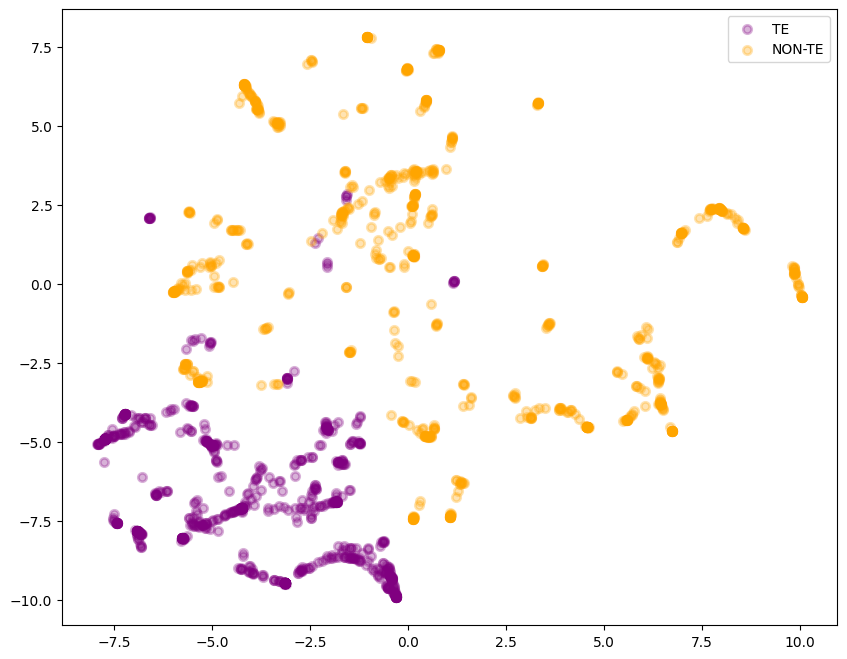

In [ ]:

# visualise again and highlight actual classes of data

target_ids = range(len(y))

plt.figure(figsize=(10, 8))
colours = ['purple','orange' ]
label = ['TE','NON-TE' ]
for i, c, label in zip(target_ids, colours, label):
    plt.scatter(tsne_pca_results[y == i, 0], tsne_pca_results[y == i, 1], c=c, label=label, alpha=0.3, linewidths = 2 )
    pass

plt.legend()
plt.show()

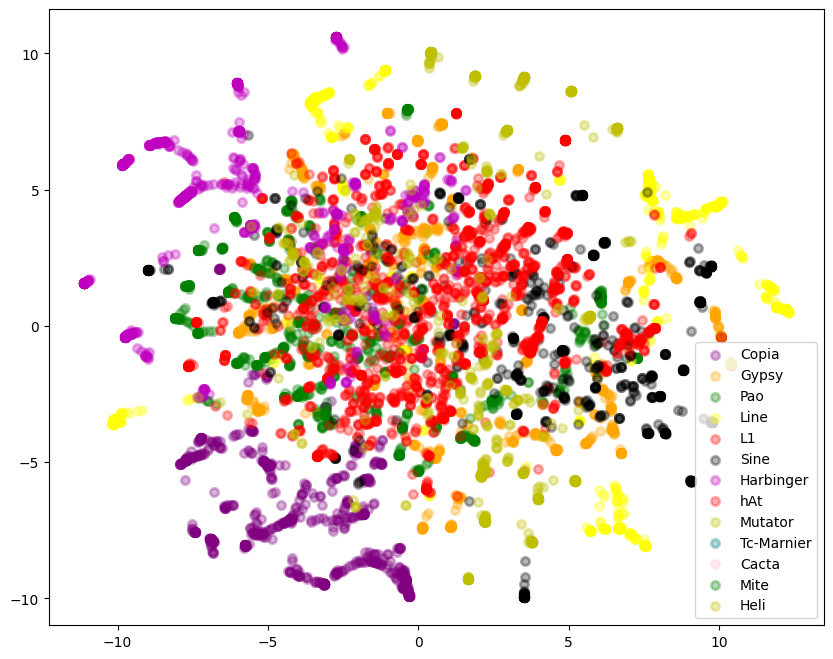

In [ ]:
# visualise again and highlight actual classes of data

target_ids = range(len(y))

plt.figure(figsize=(10, 8))
colours = ['purple','orange','g','yellow','red','black','m','r','y','teal','pink','green','y']
label = ['Copia','Gypsy','Pao','Line','L1','Sine','Harbinger','hAt','Mutator','Tc-Marnier','Cacta','Mite','Heli']
for i, c, label in zip(target_ids, colours, label):
    plt.scatter(tsne_pca_results[y == i, 0], tsne_pca_results[y == i, 1], c=c, label=label, alpha=0.3, linewidths = 2 )
    pass

plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv("TFFamily.csv")

# Separate the features (X) and labels (y)
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

# Encode categorical labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Perform feature scaling (optional but recommended for deep learning)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the input data for CNN (assuming a sequence length of 1)
input_shape = (X_train_scaled.shape[1], 1)  # Shape for Conv1D input
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define and train a CNN model for each class separately
class_labels = np.unique(y_encoded)
tsne_results = []

Training for class 0...
Epoch 1/10
203/203 [==============================] - 4s 14ms/step - loss: 0.0891 - accuracy: 0.9702 - val_loss: 0.0316 - val_accuracy: 0.9889
Epoch 2/10
203/203 [==============================] - 2s 12ms/step - loss: 0.0184 - accuracy: 0.9949 - val_loss: 0.0126 - val_accuracy: 0.9938
Epoch 3/10
203/203 [==============================] - 2s 8ms/step - loss: 0.0070 - accuracy: 0.9986 - val_loss: 0.0058 - val_accuracy: 0.9981
Epoch 4/10
203/203 [==============================] - 2s 9ms/step - loss: 0.0104 - accuracy: 0.9985 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 5/10
203/203 [==============================] - 2s 9ms/step - loss: 0.0053 - accuracy: 0.9986 - val_loss: 0.0088 - val_accuracy: 0.9963
Epoch 6/10
203/203 [==============================] - 2s 9ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0017 - val_accuracy: 0.9994
Epoch 7/10
203/203 [==============================] - 2s 9ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0019 - v

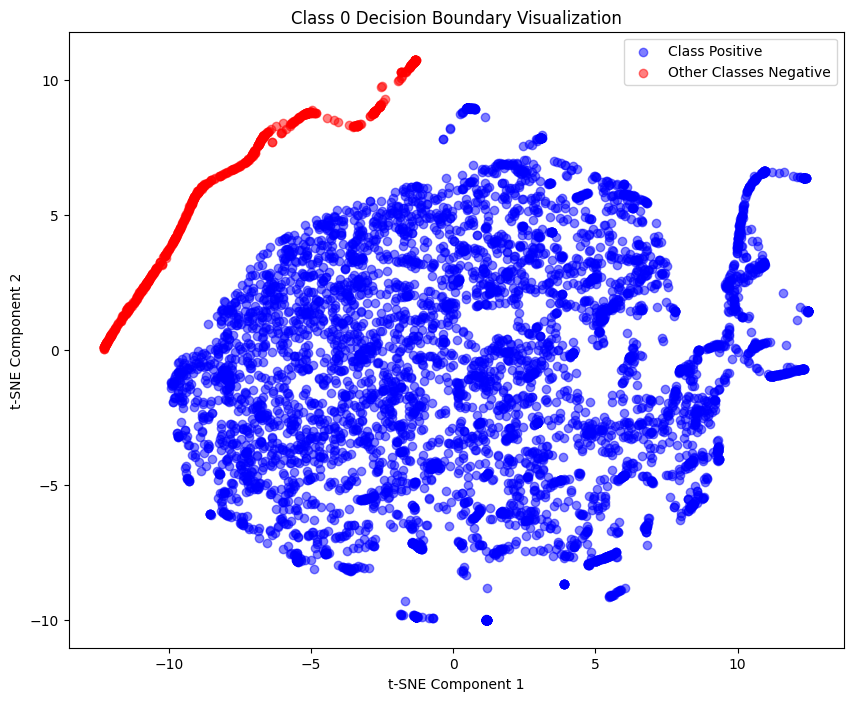

Training for class 1...
Epoch 1/10
203/203 [==============================] - 3s 10ms/step - loss: 0.2432 - accuracy: 0.9014 - val_loss: 0.1595 - val_accuracy: 0.9556
Epoch 2/10
203/203 [==============================] - 2s 9ms/step - loss: 0.1291 - accuracy: 0.9485 - val_loss: 0.0992 - val_accuracy: 0.9747
Epoch 3/10
203/203 [==============================] - 2s 9ms/step - loss: 0.0816 - accuracy: 0.9702 - val_loss: 0.0878 - val_accuracy: 0.9660
Epoch 4/10
203/203 [==============================] - 2s 12ms/step - loss: 0.0571 - accuracy: 0.9807 - val_loss: 0.0676 - val_accuracy: 0.9772
Epoch 5/10
203/203 [==============================] - 3s 15ms/step - loss: 0.0435 - accuracy: 0.9853 - val_loss: 0.0304 - val_accuracy: 0.9969
Epoch 6/10
203/203 [==============================] - 2s 9ms/step - loss: 0.0342 - accuracy: 0.9886 - val_loss: 0.0380 - val_accuracy: 0.9889
Epoch 7/10
203/203 [==============================] - 2s 12ms/step - loss: 0.0266 - accuracy: 0.9927 - val_loss: 0.0217 -

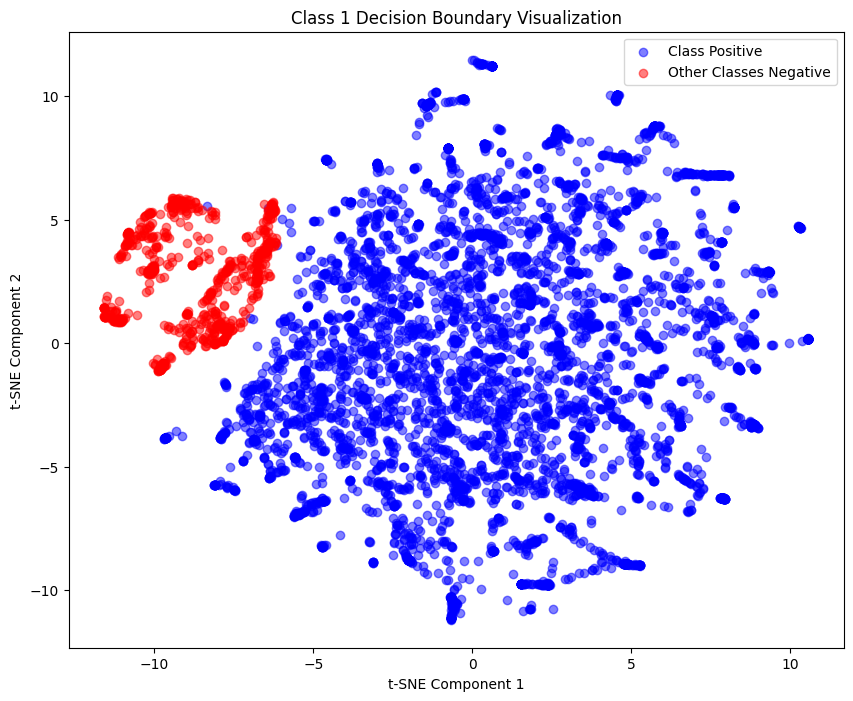

Training for class 2...
Epoch 1/10
203/203 [==============================] - 3s 10ms/step - loss: 0.2167 - accuracy: 0.9130 - val_loss: 0.1380 - val_accuracy: 0.9611
Epoch 2/10
203/203 [==============================] - 2s 9ms/step - loss: 0.1199 - accuracy: 0.9565 - val_loss: 0.0834 - val_accuracy: 0.9772
Epoch 3/10
203/203 [==============================] - 2s 9ms/step - loss: 0.0772 - accuracy: 0.9742 - val_loss: 0.0627 - val_accuracy: 0.9809
Epoch 4/10
203/203 [==============================] - 2s 10ms/step - loss: 0.0535 - accuracy: 0.9821 - val_loss: 0.0388 - val_accuracy: 0.9895
Epoch 5/10
203/203 [==============================] - 2s 10ms/step - loss: 0.0400 - accuracy: 0.9886 - val_loss: 0.0328 - val_accuracy: 0.9920
Epoch 6/10
203/203 [==============================] - 3s 15ms/step - loss: 0.0308 - accuracy: 0.9904 - val_loss: 0.0335 - val_accuracy: 0.9895
Epoch 7/10
203/203 [==============================] - 2s 11ms/step - loss: 0.0254 - accuracy: 0.9924 - val_loss: 0.0208 

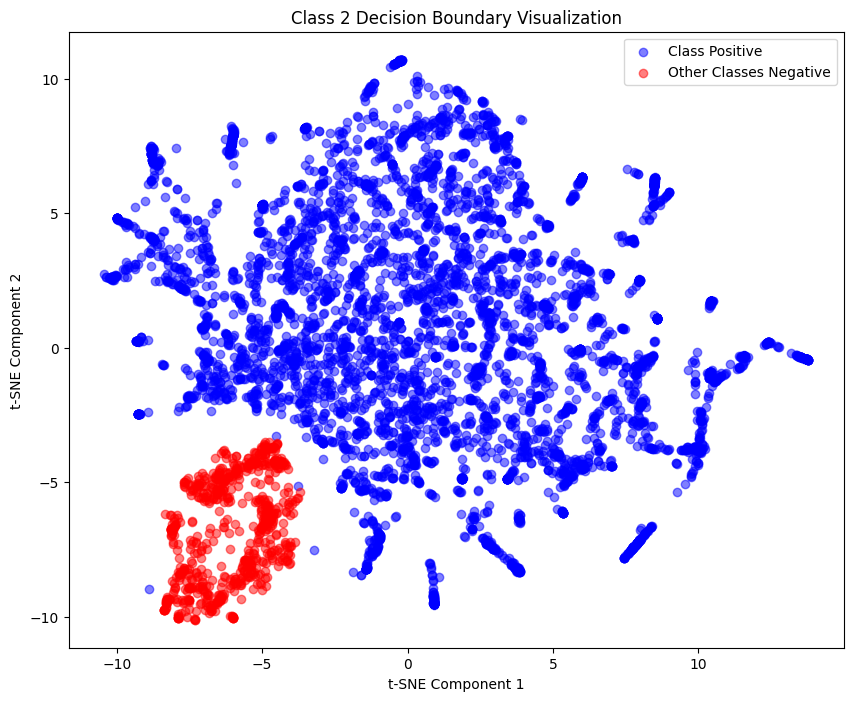

Training for class 3...
Epoch 1/10
203/203 [==============================] - 3s 11ms/step - loss: 0.0870 - accuracy: 0.9722 - val_loss: 0.0322 - val_accuracy: 0.9951
Epoch 2/10
203/203 [==============================] - 2s 10ms/step - loss: 0.0223 - accuracy: 0.9954 - val_loss: 0.0175 - val_accuracy: 0.9951
Epoch 3/10
203/203 [==============================] - 2s 10ms/step - loss: 0.0122 - accuracy: 0.9968 - val_loss: 0.0092 - val_accuracy: 0.9988
Epoch 4/10
203/203 [==============================] - 3s 15ms/step - loss: 0.0056 - accuracy: 0.9980 - val_loss: 0.0049 - val_accuracy: 0.9988
Epoch 5/10
203/203 [==============================] - 3s 14ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0023 - val_accuracy: 0.9994
Epoch 6/10
203/203 [==============================] - 2s 10ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0029 - val_accuracy: 0.9981
Epoch 7/10
203/203 [==============================] - 2s 10ms/step - loss: 0.0039 - accuracy: 0.9985 - val_loss: 0.003

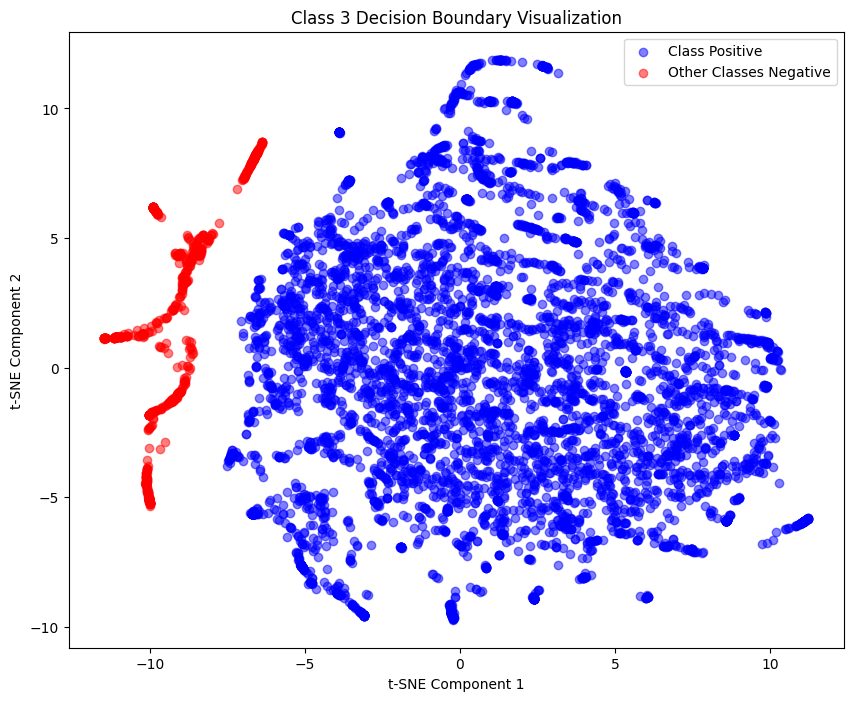

Training for class 4...
Epoch 1/10
203/203 [==============================] - 3s 11ms/step - loss: 0.3144 - accuracy: 0.8920 - val_loss: 0.2757 - val_accuracy: 0.9043
Epoch 2/10
203/203 [==============================] - 2s 11ms/step - loss: 0.2361 - accuracy: 0.9148 - val_loss: 0.1900 - val_accuracy: 0.9272
Epoch 3/10
203/203 [==============================] - 2s 11ms/step - loss: 0.1753 - accuracy: 0.9324 - val_loss: 0.1458 - val_accuracy: 0.9568
Epoch 4/10
203/203 [==============================] - 2s 10ms/step - loss: 0.1407 - accuracy: 0.9471 - val_loss: 0.1212 - val_accuracy: 0.9593
Epoch 5/10
203/203 [==============================] - 3s 13ms/step - loss: 0.1178 - accuracy: 0.9562 - val_loss: 0.1060 - val_accuracy: 0.9698
Epoch 6/10
203/203 [==============================] - 3s 16ms/step - loss: 0.0997 - accuracy: 0.9639 - val_loss: 0.0864 - val_accuracy: 0.9691
Epoch 7/10
203/203 [==============================] - 2s 12ms/step - loss: 0.0787 - accuracy: 0.9736 - val_loss: 0.071

KeyboardInterrupt: 

In [ ]:
for label in class_labels:
    print(f"Training for class {label}...")

    # Create a binary label for current class vs all others
    y_binary_train = (y_train == label).astype(int)
    y_binary_test = (y_test == label).astype(int)

    # Define the CNN model
    cnn_model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # Binary classification output layer
    ])

    cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    cnn_model.fit(X_train_reshaped, y_binary_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test_reshaped, y_binary_test))

    # Extract features from the CNN model
    feature_extractor = tf.keras.Model(inputs=cnn_model.input, outputs=cnn_model.layers[-3].output)
    features_train = feature_extractor.predict(X_train_reshaped)
    features_test = feature_extractor.predict(X_test_reshaped)

    # Apply PCA and then t-SNE for dimensionality reduction
    pca = PCA(n_components=50)
    pca_result = pca.fit_transform(features_train)
    tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=300)
    tsne_result = tsne.fit_transform(pca_result)
    tsne_results.append(tsne_result)

    # Plot decision boundary with scatter plot
    plt.figure(figsize=(10, 8))

    # Scatter plot for decision boundary visualization
    colours = ['b', 'r']  # Blue for class positive, Red for other classes negative
    labels = ['Class Positive', 'Other Classes Negative']

    for i, (color, lbl) in enumerate(zip(colours, labels)):
        plt.scatter(tsne_result[y_binary_train == i, 0], tsne_result[y_binary_train == i, 1], c=color, label=lbl, alpha=0.5)

    plt.title(f"Class {label} Decision Boundary Visualization")
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend()
    plt.show()

In [ ]:
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train_reshaped, y_binary_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test_reshaped, y_binary_test))

# Extract features from the CNN model
feature_extractor = tf.keras.Model(inputs=cnn_model.input, outputs=cnn_model.layers[-3].output)
features_train = feature_extractor.predict(X_train_reshaped)
features_test = feature_extractor.predict(X_test_reshaped)

IndentationError: unexpected indent (<ipython-input-143-26eeee51f2f9>, line 4)

Cumulative explained variation for 50 principal components: 0.8096617881862221
t-SNE done! Time elapsed: 42.15414834022522 seconds


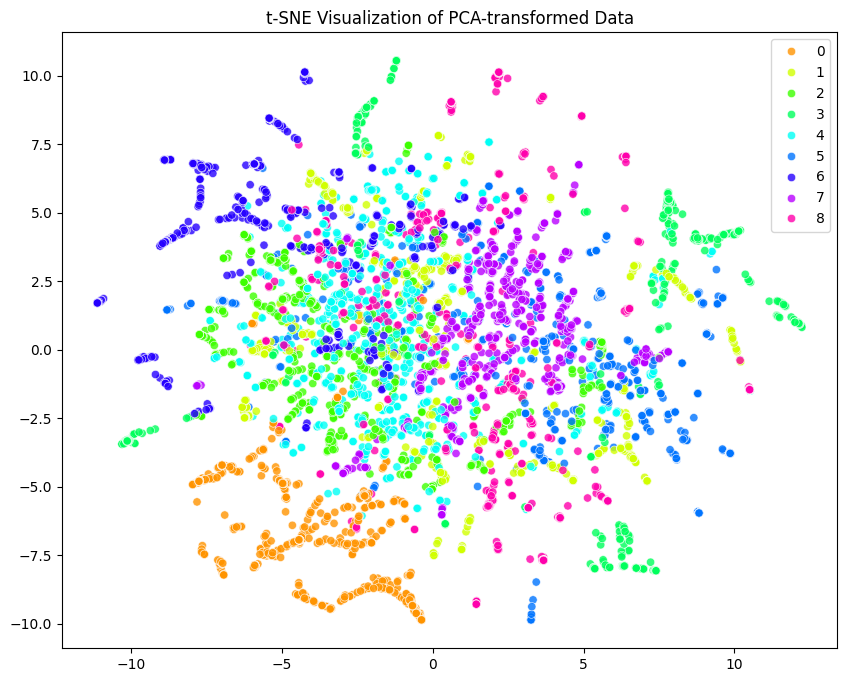

Epoch 1/20
203/203 [==============================] - 2s 5ms/step - loss: 1.5712 - accuracy: 0.4687 - val_loss: 0.8572 - val_accuracy: 0.7840
Epoch 2/20
203/203 [==============================] - 1s 3ms/step - loss: 0.8572 - accuracy: 0.7224 - val_loss: 0.4718 - val_accuracy: 0.8765
Epoch 3/20
203/203 [==============================] - 1s 3ms/step - loss: 0.5837 - accuracy: 0.8102 - val_loss: 0.3088 - val_accuracy: 0.9247
Epoch 4/20
203/203 [==============================] - 1s 3ms/step - loss: 0.4221 - accuracy: 0.8645 - val_loss: 0.2203 - val_accuracy: 0.9432
Epoch 5/20
203/203 [==============================] - 1s 3ms/step - loss: 0.3407 - accuracy: 0.8900 - val_loss: 0.1673 - val_accuracy: 0.9556
Epoch 6/20
203/203 [==============================] - 1s 3ms/step - loss: 0.2760 - accuracy: 0.9131 - val_loss: 0.1415 - val_accuracy: 0.9586
Epoch 7/20
203/203 [==============================] - 1s 3ms/step - loss: 0.2298 - accuracy: 0.9218 - val_loss: 0.1219 - val_accuracy: 0.9623
Epoch 

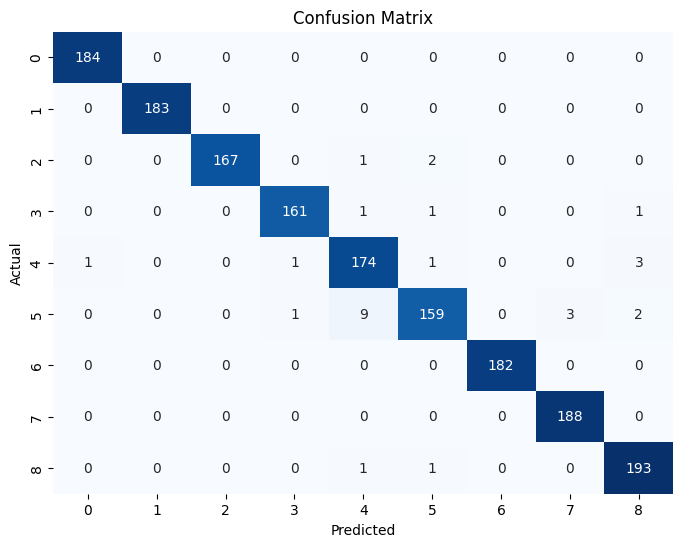

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       184
           1       1.00      1.00      1.00       183
           2       1.00      0.98      0.99       170
           3       0.99      0.98      0.98       164
           4       0.94      0.97      0.95       180
           5       0.97      0.91      0.94       174
           6       1.00      1.00      1.00       182
           7       0.98      1.00      0.99       188
           8       0.97      0.99      0.98       195

    accuracy                           0.98      1620
   macro avg       0.98      0.98      0.98      1620
weighted avg       0.98      0.98      0.98      1620



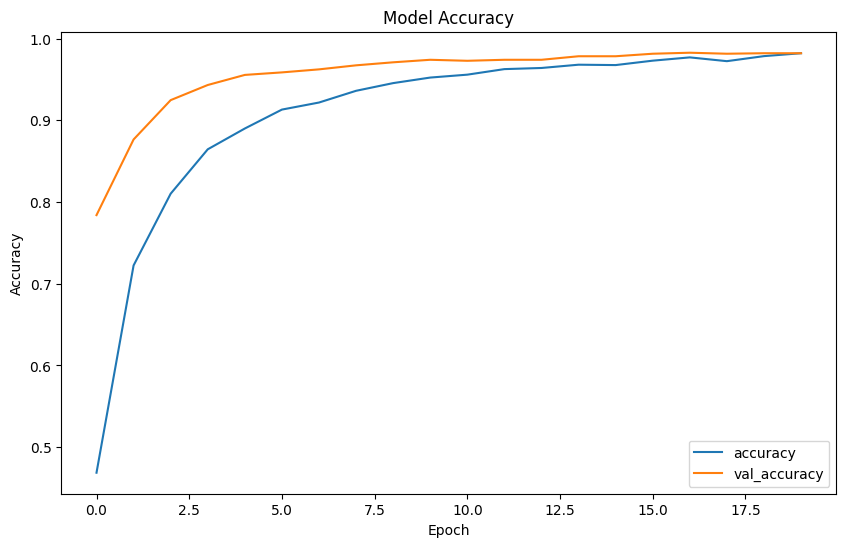

In [ ]:


cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for each class separately
tsne_results = []
class_labels = np.unique(y_encoded)

for label in class_labels:
    print(f"Training for class {label}...")
    y_binary_train = (y_train == label).astype(int)
    y_binary_test = (y_test == label).astype(int)

    cnn_model.fit(X_train, y_binary_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_binary_test))

    # Extract features from the last convolutional layer
    feature_extractor = tf.keras.Model(inputs=cnn_model.input, outputs=cnn_model.layers[-3].output)
    features_train = feature_extractor.predict(X_train)
    features_test = feature_extractor.predict(X_test)

    # Apply PCA and then t-SNE for dimensionality reduction
    pca = PCA(n_components=50)
    pca_result = pca.fit_transform(features_train)
    tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=300)
    tsne_result = tsne.fit_transform(pca_result)
    tsne_results.append(tsne_result)

    # Plot decision boundary
    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_result[y_binary_train == 1, 0], tsne_result[y_binary_train == 1, 1], c='b', label='Class Positive', alpha=0.5)
    plt.scatter(tsne_result[y_binary_train == 0, 0], tsne_result[y_binary_train == 0, 1], c='r', label='Other Classes Negative', alpha=0.5)
    plt.title(f"Class {label} Decision Boundary Visualization")
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend()
    plt.show()


[LightGBM] [Info] Number of positive: 29, number of negative: 31
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 44
[LightGBM] [Info] Number of data points in the train set: 60, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.483333 -> initscore=-0.066691
[LightGBM] [Info] Start training from score -0.066691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

LightGBMError: Number of classes must be 1 for non-multiclass training

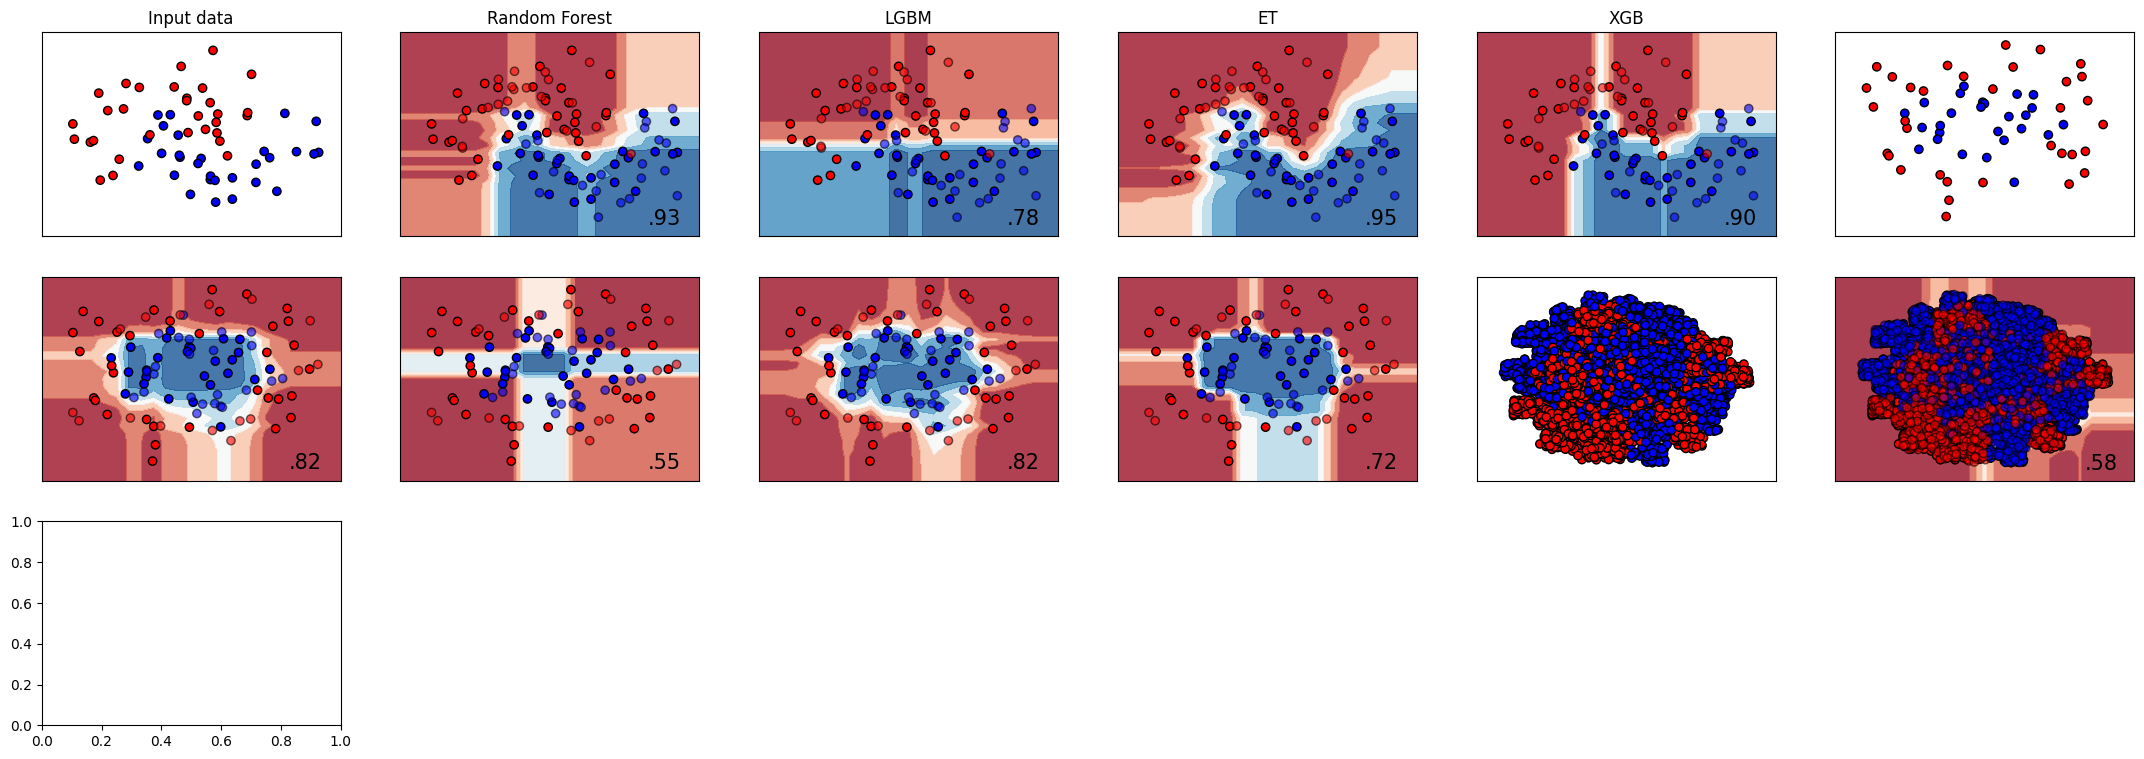

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
from xgboost import XGBClassifier

h=0.2
names = [
    "Random Forest",
    "LGBM",
    "ET",
    "XGB",
]
from sklearn.linear_model import LogisticRegression

classifiers = [
    RandomForestClassifier(max_depth=5, n_estimators=100),
    LGBMClassifier(),
    ExtraTreesClassifier(),
    XGBClassifier() ,
LogisticRegression()
]

X, y =  tsne_pca_results,y
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
# Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )

         # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1
plt.figure(figsize=(20, 20), dpi=600)

plt.tight_layout()
plt.show()



sns.scatterplot(
    x=tsne_pca_results[:, 0], y=tsne_pca_results[:, 1],
    hue=y,
    data=X,
    legend="full",
    alpha=0.3
).set(title="Feature Space Visualization of Raw Data")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons, make_circles
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

In [ ]:
# Assuming your models are already loaded
lstm_model = load_model('lstm_modeltffam.h5')
bilstm_model = load_model('bi_lstm_modeltffam.h5')
cnn_model = load_model('cnn_modeltffam.h5')
gru_model = load_model('gru_modeltffam.h5')

In [ ]:
# Load the dataset (replace with your actual dataset loading)
df = pd.read_csv("TFFamily.csv")

# Separate the features (X) and labels (y)
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

# Perform train-test split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling (optional but recommended for deep learning)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

In [ ]:
# Apply PCA and t-SNE
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(X_train_scaled)  # Fit PCA on the training set

tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=300, random_state=42)
tsne_pca_results = tsne.fit_transform(pca_result_50)

In [ ]:
# Create meshgrid for decision boundary visualization
h = 0.2  # step size in the mesh

x_min, x_max = tsne_pca_results[:, 0].min() - 1, tsne_pca_results[:, 0].max() + 1
y_min, y_max = tsne_pca_results[:, 1].min() - 1, tsne_pca_results[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plotting decision boundaries for each model
models = [lstm_model, bilstm_model, cnn_model, gru_model]
model_names = ['LSTM', 'BiLSTM', 'CNN', 'GRU']

plt.figure(figsize=(18, 12))

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

In [ ]:
# Iterate over models
for idx, (model, name) in enumerate(zip(models, model_names), 1):
    plt.subplot(2, 2, idx)

    # Reshape meshgrid points to match LSTM input shape
    meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
    meshgrid_points_reshaped = np.expand_dims(meshgrid_points, axis=1)  # Add the timestep dimension

    # Predict on the reshaped meshgrid points
    Z = model.predict(meshgrid_points_reshaped)

    # Put the result into a color plot
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

    # Plot the training points
    plt.scatter(tsne_pca_results[:, 0], tsne_pca_results[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from matplotlib.colors import ListedColormap

df = pd.read_csv("TFFamily.csv")

# Separate the features (X) and labels (y)
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

# Perform train-test split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling (optional but recommended for deep learning)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

# Reshape the input data for LSTM (assuming a sequence length of 1)
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


X_train_2d = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
X_train_2d = scaler.fit_transform(X_train_2d)
X_train_cnn = X_train_2d.reshape(X_train_scaled.shape)

# Reshape the testing data to 2 dimensions for scaling
X_test_2d = X_test_scaled.reshape(X_test_scaled.shape[0], -1)
X_test_2d = scaler.transform(X_test_2d)
X_test_cnn = X_test_2d.reshape(X_test_scaled.shape)

In [ ]:
# Assuming you have the models loaded and ready for inference
lstm_model = load_model('lstm_modeltffam.h5')
bi_lstm_model = load_model('bi_lstm_modeltffam.h5')
gru_model = load_model('gru_modeltffam.h5')

# Function to extract intermediate layer outputs
from tensorflow.keras import Model

def extract_intermediate_output(model, layer_name, X):
    intermediate_layer_model = Model(inputs=model.input,
                                     outputs=model.get_layer(layer_name).output)
    intermediate_output = intermediate_layer_model.predict(X)
    return intermediate_output

#Self

In [ ]:
# Evaluation function
def evaluate_model(model, X_test_reshaped, y_test):
    # Obtain predictions from the model
    y_pred = model.predict(X_test_reshaped)

    # Reshape the predicted values to match the expected shape
    y_pred_binary = np.round(y_pred).flatten()

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_binary)
    print("Accuracy:", accuracy)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred_binary)
    tn, fp, fn, tp = cm.ravel()

    # Calculate sensitivity and specificity
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)

    # Calculate F1 score
    f1_score = 2 * (tp / (2 * tp + fp + fn))
    print("F1 Score:", f1_score)

    # Calculate Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_test, y_pred_binary)
    print("MCC:", mcc)

    # Calculate ROC and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    print("AUC:", roc_auc)

    # Print classification report
    print(classification_report(y_test, y_pred_binary))

# Evaluate the LSTM model
print("LSTM Model:")
evaluate_model(lstm_model, X_train_reshaped, y_train)

# Evaluate the Bi-LSTM model
print("Bi-LSTM Model:")
evaluate_model(bi_lstm_model, X_train_reshaped, y_train)

# Evaluate the CNN model
print("CNN Model:")
evaluate_model(cnn_model, X_train_cnn, y_train)

# Evaluate the GRU model
print("GRU Model:")
evaluate_model(gru_model, X_train_reshaped, y_train)

LSTM Model:
27/27 [==============================] - 0s 3ms/step
Accuracy: 1.0
Sensitivity: 1.0
Specificity: 1.0
F1 Score: 1.0
MCC: 1.0
AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       427
           1       1.00      1.00      1.00       408

    accuracy                           1.00       835
   macro avg       1.00      1.00      1.00       835
weighted avg       1.00      1.00      1.00       835

Bi-LSTM Model:
27/27 [==============================] - 0s 4ms/step
Accuracy: 1.0
Sensitivity: 1.0
Specificity: 1.0
F1 Score: 1.0
MCC: 1.0
AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       427
           1       1.00      1.00      1.00       408

    accuracy                           1.00       835
   macro avg       1.00      1.00      1.00       835
weighted avg       1.00      1.00      1.00       835

CNN Model:
27/27 [==============================] - 0